<a href="https://colab.research.google.com/github/Shanmukha2775/Fmml-lab-2024/blob/main/Updated%207_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Ganesh Chandan

kanakala.ganesh@research.iiit.ac.in

# Hierarchical Clustering

KMeans is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

But there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges with aplomb. It takes away the problem of having to pre-define the number of clusters. Sounds like a dream! So, let’s see what hierarchical clustering is and how it improves on K-means.

## What is Hierarchical Clustering?

Let’s say we have the below points and we want to cluster them into groups:

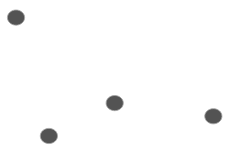

We can assign each of these points to a separate cluster:

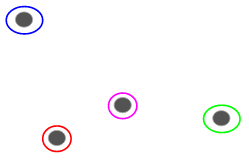

Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:

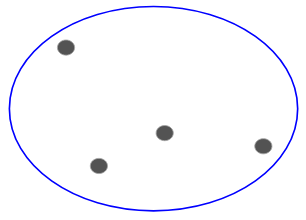

We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. I will discuss how to decide the number of clusters in a later section. For now, let’s look at the different types of hierarchical clustering.

## Agglomerative Hierarchical Clustering

In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

    Compute the proximity matrix
    Let each data point be a cluster
    Repeat: Merge the two closest clusters and update the proximity matrix
    Until only a single cluster remains

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

    Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.

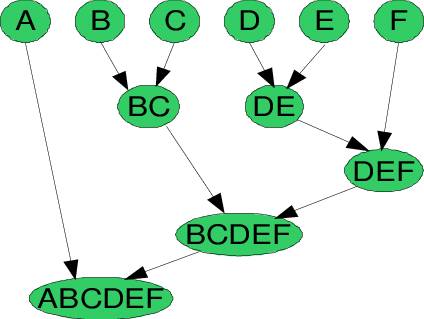

    Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.
    Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
    Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
    Step- 5: Finally, all the clusters are merged together and form a single cluster.

Here is what this process in action looks like.

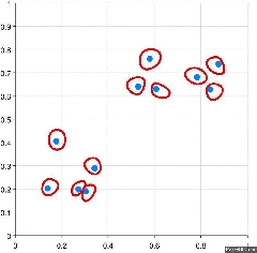

## Dendograms

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

As already said a Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram you can tell how the cluster is formed.

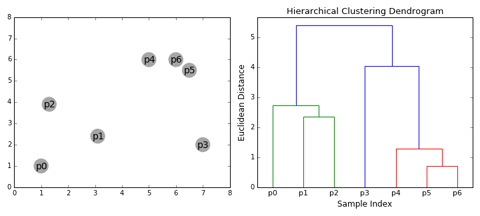



Note:-

    Distance between data points represents dissimilarities.
    Height of the blocks represents the distance between clusters.

So you can observe from the above figure that initially P5 and P6 which are closest to each other by any other point are combined into one cluster followed by P4 getting merged into the same cluster(C2). Then P1and P2 gets combined into one cluster followed by P0 getting merged into the same cluster(C4). Now P3 gets merged in cluster C2 and finally, both clusters get merged into one.

**How do you decide when to stop merging the clusters?**

You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

For example in the below figure L3 can traverse maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

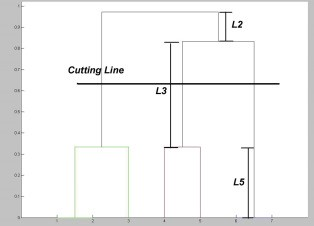

In [ ]:
# load necessary files

!curl -L -o 'Mall_Customers.csv' 'https://drive.google.com/uc?export=download&id=1sgy48AZi0It6VBMQXTJbRLjlIg6E7HlY'
!curl -L -o 'Wholesale customers data.csv' 'https://drive.google.com/uc?export=download&id=1Jvqxa_KkjX8nZ5oxXe_6CzQ6aI3vVIZV'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4286  100  4286    0     0   1960      0  0:00:02  0:00:02 --:--:--  5207
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15021  100 15021    0     0   6786      0  0:00:02  0:00:02 --:--:--  7880


### Agglomerative Clustering on Mall Visitors Database

In [ ]:
# importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

Let's load the dataset

In [ ]:
dataset = pd.read_csv('./Mall_Customers.csv')

In [ ]:
X = dataset.iloc[:, [3, 4]].values

Next, we need to choose the number of clusters and for doing this we’ll use Dendrograms.

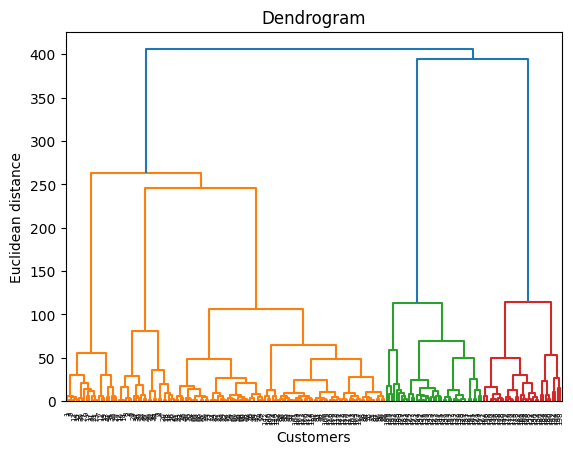

In [ ]:
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

As we have already discussed to choose the number of clusters we draw a horizontal line to the longest line that traverses maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

In this case, it's 5. So let's fit our Agglomerative model with 5 clusters.

In [ ]:
# importing AgglomerativeClustering algorithm from sklearn
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

#### Visualizing the results.

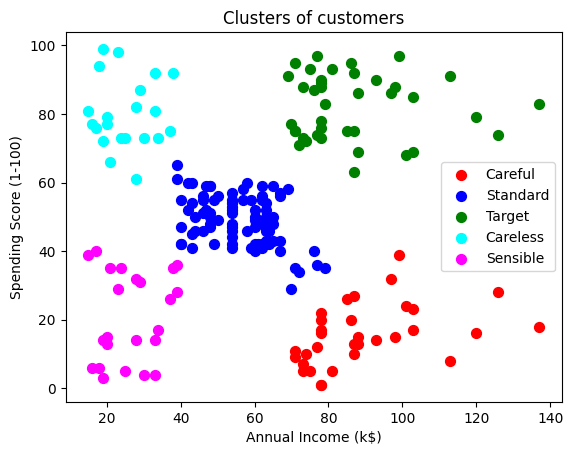

In [ ]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [ ]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('./Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Different types of linkages -

1. 'ward’ minimizes the variance of the clusters being merged.

2. ‘average’ uses the average of the distances of each observation of the two sets.

3. ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

4. ‘single’ uses the minimum of the distances between all observations of the two sets.

Let us visualize the different types of linkages.



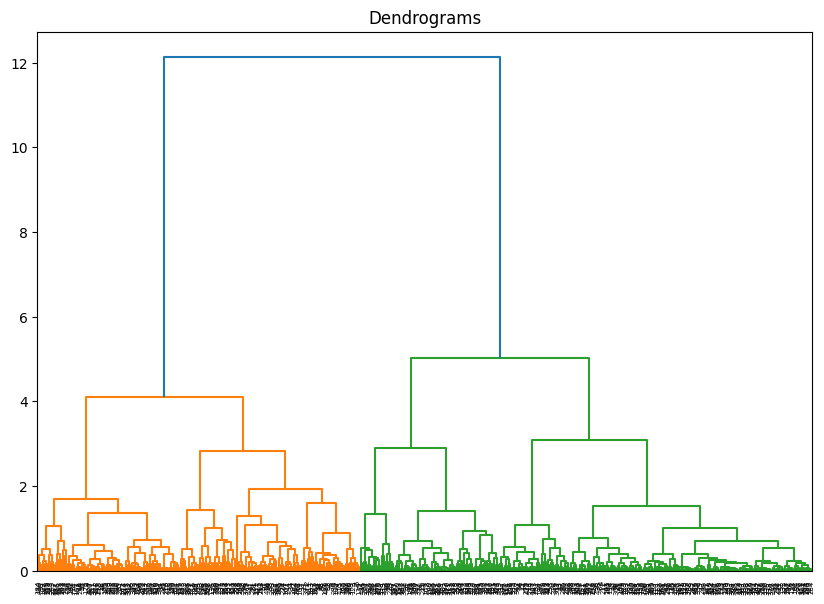

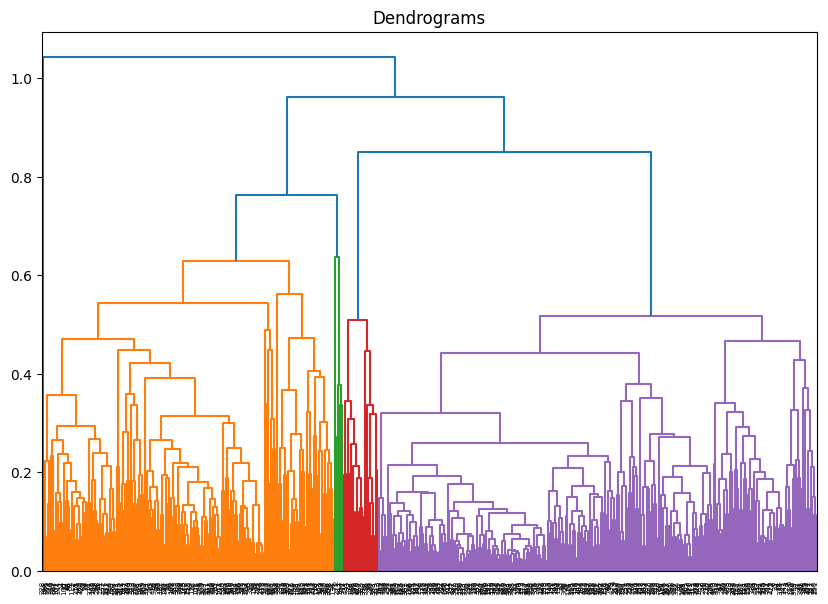

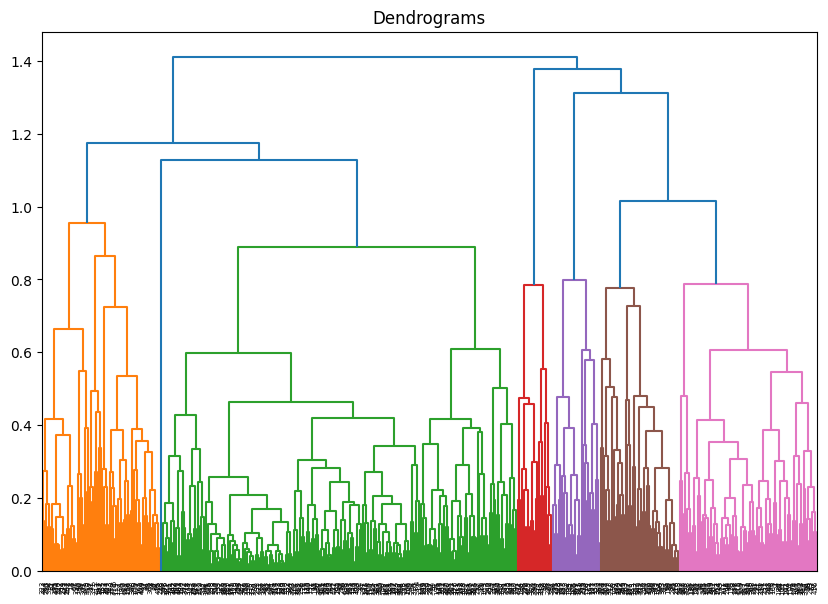

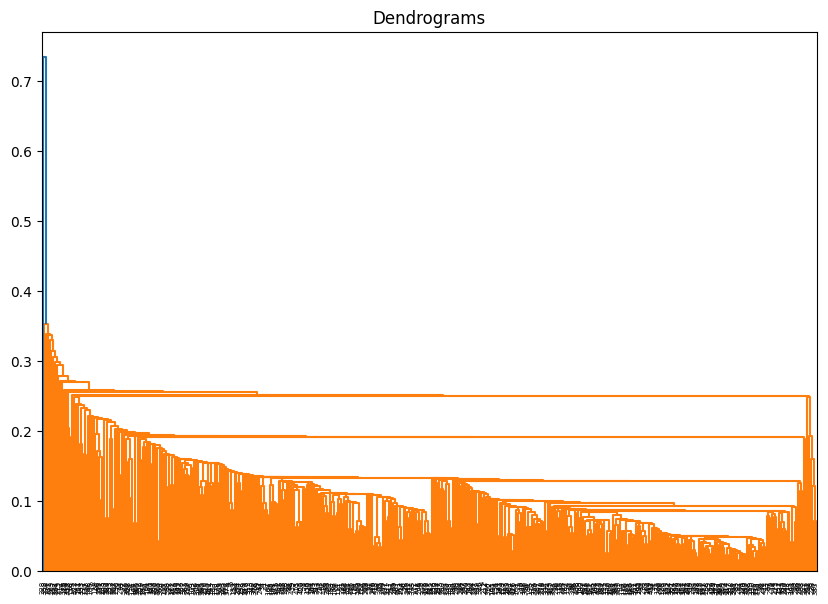

In [ ]:
import scipy.cluster.hierarchy as shc
linkages = ['ward', 'average','complete','single']
for linkage in linkages:
  plt.figure(figsize=(10, 7))
  plt.title("Dendrograms")
  dend = shc.dendrogram(shc.linkage(data_scaled, method=linkage))

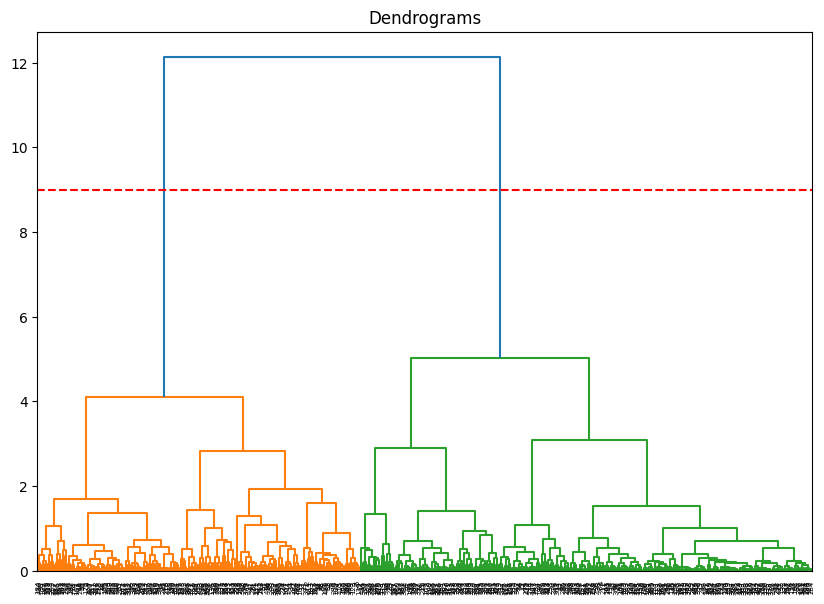

In [ ]:
threshold = 9 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=threshold, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

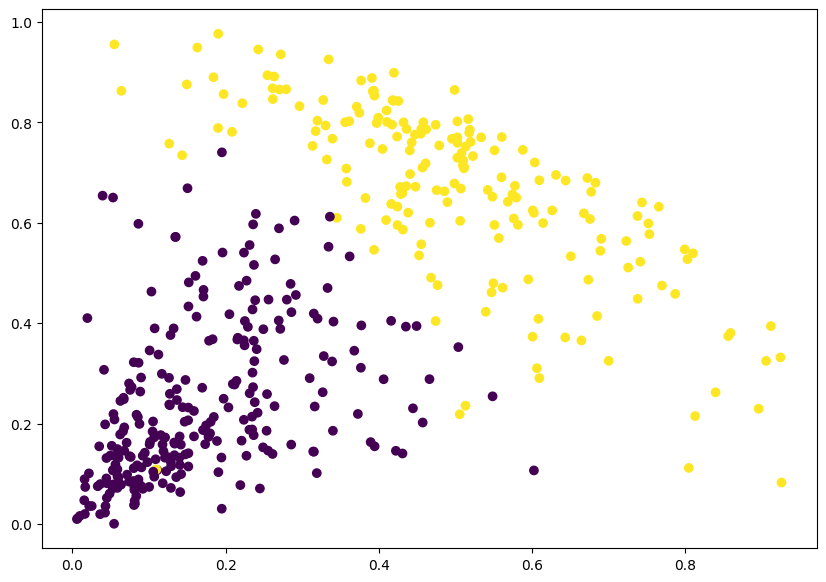

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

## Divisive Hierarchical Clustering

In Divisive or DIANA(DIvisive ANAlysis Clustering) is a top-down clustering method where we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. So this clustering approach is exactly opposite to Agglomerative clustering.

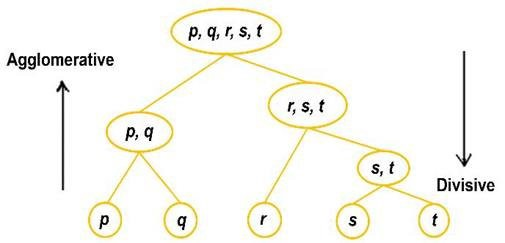

There is evidence that divisive algorithms produce more accurate hierarchies than agglomerative algorithms in some circumstances but is conceptually more complex.

In both agglomerative and divisive hierarchical clustering, users need to specify the desired number of clusters as a termination condition(when to stop merging).

Divisive clustering methods are fairly complicated to implement, so we will not do that here. You can check out open source implementations like https://github.com/div338/Divisive-Clustering-Analysis-Program-DIANA- for further details.

## Points to think about
1. What is the need for hierarchical clustering?
2. What are the key differences between KMeans Clustering and Hierarchical Clustering?
3. What is the advantages of Density Based Clustering over KMeans?



#**ANSWER 1:**

* The need for hierarchical clustering arises from several important points and considerations in the field of data analysis and clustering:

**1.Hierarchy Representation:**

* Hierarchical clustering provides a hierarchical structure of clusters, often visualized as a dendrogram.

**2.No Predefined Number of Clusters:**

* Unlike some other clustering algorithms, hierarchical clustering does not require specifying the number of clusters beforehand.

**3.Exploration of Cluster Relationships:**

* Hierarchical clustering enables the exploration of relationships between clusters at various levels of the hierarchy. Analysts can choose the level of detail that suits their analysis, facilitating the identification of subgroups or hierarchical structures within the data.

**4.Flexibility in Agglomerative and Divisive Approaches:**

* Hierarchical clustering can be performed using either agglomerative (bottom-up) or divisive (top-down) approaches. This flexibility allows users to choose a method that fits the nature of their data and the goals of their analysis.

**5.Visual Interpretation:**

* The dendrogram produced by hierarchical clustering offers a visual representation of the clustering structure, making it easier for analysts to interpret and communicate the results to stakeholders.

**6.Identification of Nested Clusters:**

* Hierarchical clustering is effective in identifying nested or overlapping clusters within the data.

**7.Handling Irregularly Shaped Clusters:**

* Hierarchical clustering can handle clusters of arbitrary shapes, making it suitable for datasets where clusters may have complex and irregular structures.

**8.Decision Support:**

* The hierarchical clustering results can aid decision-making processes by providing insights into the hierarchical organization of data. This is valuable in various fields, including biology, marketing, and social sciences.



#**ANSWER 2:**

* K-means clustering and hierarchical clustering are two distinct approaches to clustering data:

**1.Algorithmic Approach:**

* **K-means:**
It is an iterative, partitioning algorithm. It starts by randomly assigning data points to clusters and then iteratively refines the cluster assignments to minimize the sum of squared distances within each cluster.

* **Hierarchical:** It builds a hierarchy of clusters. It can be agglomerative (starting with individual data points and merging them) or divisive (starting with a single cluster and splitting it into smaller ones).

**2.Number of Clusters:**

* **K-means:** Requires specifying the number of clusters (K) beforehand, and the algorithm aims to partition the data into exactly K clusters.

* **Hierarchical:** Does not require specifying the number of clusters beforehand. The hierarchy allows for exploration of clusters at different levels, providing a dendrogram that shows the relationships between clusters at various distances.

**3.Cluster Shape:**

* **K-means:** Assumes that clusters are spherical and equally sized. It may struggle with non-spherical or unevenly sized clusters.

* **Hierarchical:**Can handle clusters of various shapes and sizes due to its tree-like structure.

**4.Outliers:**

* **K-means:** Sensitive to outliers, as they can heavily influence the cluster centroids.
* **Hierarchical:** Can be more robust to outliers, especially in agglomerative hierarchical clustering.

**5.Interpretability:**

* **K-means:** Provides a clear assignment of data points to clusters once the algorithm converges.
* **Hierarchical:** Provides a hierarchical structure that can offer insights into the relationships between clusters at different levels.

**6.Computational Complexity:**

* **K-means:** Generally computationally efficient, especially for large datasets.

* **Hierarchical:** Can be more computationally intensive, especially for large datasets, as it needs to maintain the entire hierarchy.

**7.Merging and Splitting:**

* **K-means:** Only performs merging (data points into clusters) during its iterations.
* **Hierarchical:** Can perform both merging (agglomerative) and splitting (divisive) operations.



#**ANSWER 3:**

* Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a density-based clustering algorithm that has some advantages over traditional partitioning algorithms like K-means. Here are some advantages of DBSCAN over K-means

**Handling Irregularly Shaped Clusters:**

**DBSCAN:**
* Can discover clusters of arbitrary shapes and sizes. It is not restricted to finding spherical or isotropic clusters, making it more flexible in capturing complex patterns in the data.

 **K-means:** Assumes that clusters are spherical and equally sized, which may not be suitable for datasets with non-uniformly shaped or elongated clusters.

**No Need to Specify the Number of Clusters (K):**

**DBSCAN:**
* Does not require specifying the number of clusters beforehand. It identifies clusters based on the density of data points, and the number of clusters emerges naturally from the data.
***K-means:** Requires the user to specify the number of clusters (K) in advance, which may be challenging when the underlying cluster structure is not known.

**Robust to Outliers:**

**DBSCAN:**
* Is less sensitive to outliers as it identifies core samples based on the density of surrounding points. Outliers are often treated as noise and not assigned to any cluster.
***K-means:** Can be influenced by outliers, affecting the position of cluster centroids.

**Variable Cluster Density:**

**DBSCAN:**
* Adapts well to clusters with varying densities. It can identify dense regions as well as sparser areas, providing a more nuanced representation of the data.
***K-means:** Assumes that clusters have approximately similar densities, which may not be the case in datasets with clusters of varying densities.
**Automatic Detection of Noise:**

**DBSCAN:**
* Can automatically identify and label noisy data points that do not belong to any cluster, helping in distinguishing between meaningful patterns and noise.
***K-means:** May assign all data points to clusters, making it challenging to identify and filter out noisy observations.
**Flexibility in Cluster Size:**

**DBSCAN:**
* Can identify clusters of different sizes, which is useful when the sizes of clusters in the data are unknown or vary.
***K-means:** Tends to produce clusters of approximately equal sizes, and the assumption of equal-sized clusters may not always hold in real-world datasets.

## Conclusion


Hierarchical clustering is a very useful way of segmentation. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means. However, it doesn't work well when we have huge amount of data.

## Resources and References

1. https://en.wikipedia.org/wiki/Hierarchical_clustering
2. https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
3. https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec
4. https://www.kdnuggets.com/2019/09/hierarchical-clustering.html

### Exercises

* Play around with different linkages and thresholds for Mall data, then use the same code base for IRIS and DIGITS dataset, to see if the optimal clusters is reasonable or not (iris should be three, digits should be 10)

* Compare the results of the that with Kmeans on the same datasets, this would require using Kmeans on Mall dataset and Wholesale customer dataset.

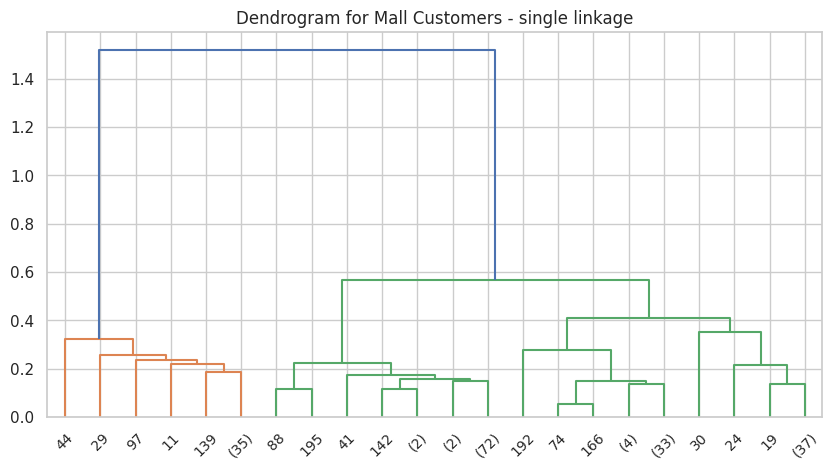

Method: single, Threshold: 0.5, Estimated Clusters: 7
Method: single, Threshold: 1.0, Estimated Clusters: 15
Method: single, Threshold: 1.5, Estimated Clusters: 22
Method: single, Threshold: 2.0, Estimated Clusters: 30
Method: single, Threshold: 2.5, Estimated Clusters: 37


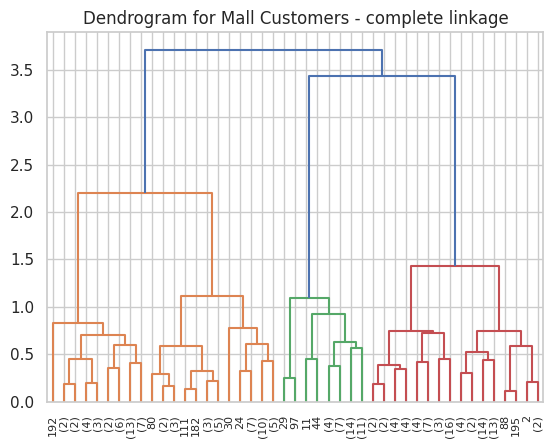

Method: complete, Threshold: 0.5, Estimated Clusters: 7
Method: complete, Threshold: 1.0, Estimated Clusters: 15
Method: complete, Threshold: 1.5, Estimated Clusters: 22
Method: complete, Threshold: 2.0, Estimated Clusters: 30
Method: complete, Threshold: 2.5, Estimated Clusters: 37


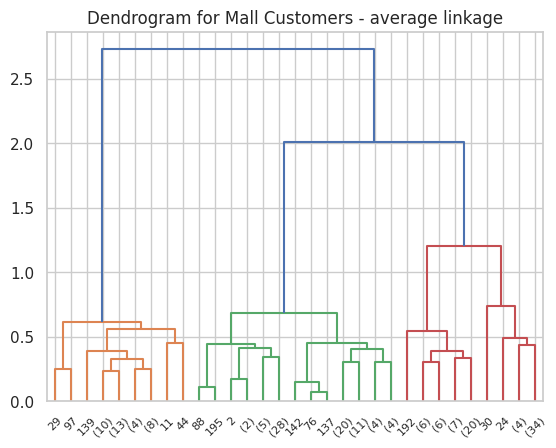

Method: average, Threshold: 0.5, Estimated Clusters: 7
Method: average, Threshold: 1.0, Estimated Clusters: 15
Method: average, Threshold: 1.5, Estimated Clusters: 22
Method: average, Threshold: 2.0, Estimated Clusters: 30
Method: average, Threshold: 2.5, Estimated Clusters: 37


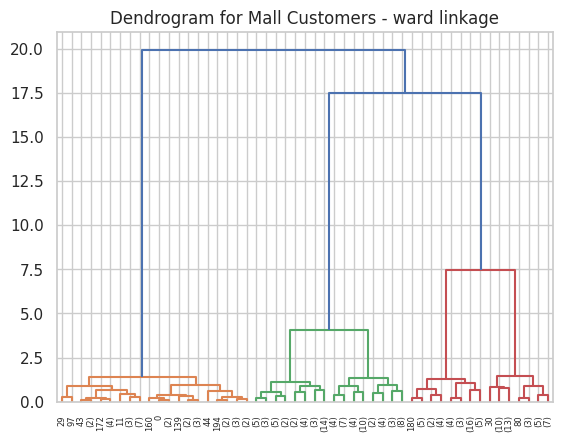

Method: ward, Threshold: 0.5, Estimated Clusters: 7
Method: ward, Threshold: 1.0, Estimated Clusters: 15
Method: ward, Threshold: 1.5, Estimated Clusters: 22
Method: ward, Threshold: 2.0, Estimated Clusters: 30
Method: ward, Threshold: 2.5, Estimated Clusters: 37


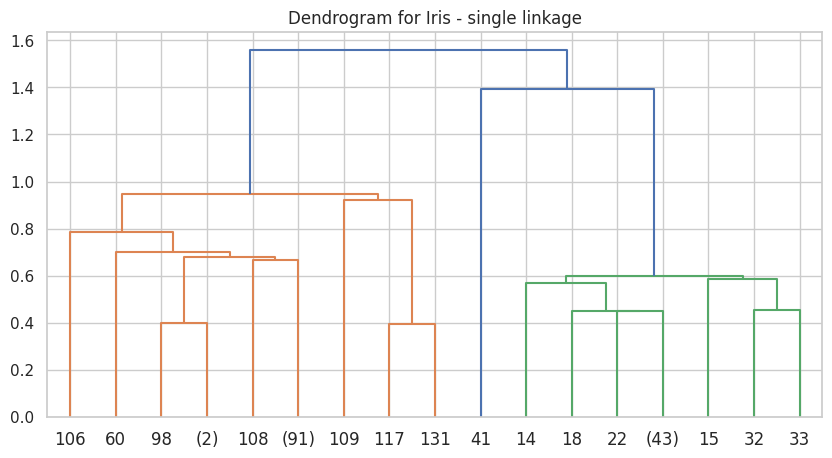

Method: single, Threshold: 0.5, Estimated Clusters: 1
Method: single, Threshold: 1.0, Estimated Clusters: 3
Method: single, Threshold: 1.5, Estimated Clusters: 4
Method: single, Threshold: 2.0, Estimated Clusters: 6
Method: single, Threshold: 2.5, Estimated Clusters: 7


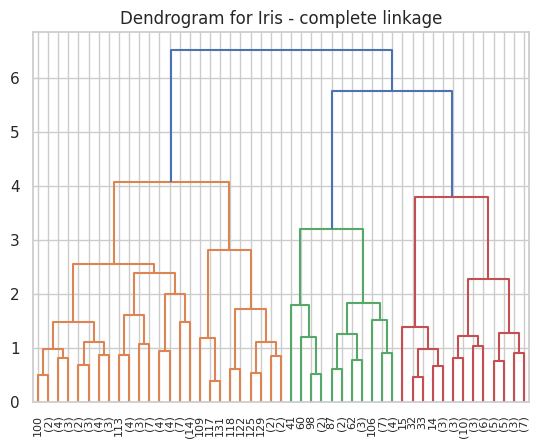

Method: complete, Threshold: 0.5, Estimated Clusters: 1
Method: complete, Threshold: 1.0, Estimated Clusters: 3
Method: complete, Threshold: 1.5, Estimated Clusters: 4
Method: complete, Threshold: 2.0, Estimated Clusters: 6
Method: complete, Threshold: 2.5, Estimated Clusters: 7


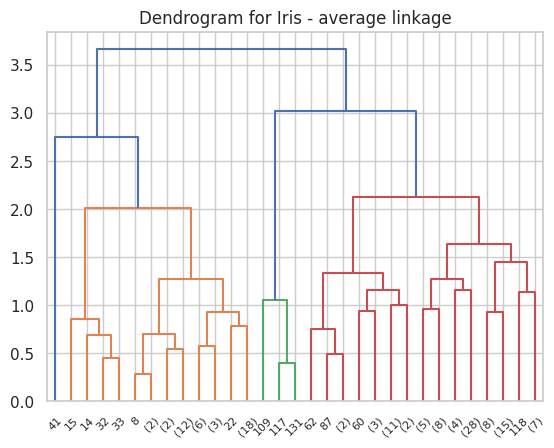

Method: average, Threshold: 0.5, Estimated Clusters: 1
Method: average, Threshold: 1.0, Estimated Clusters: 3
Method: average, Threshold: 1.5, Estimated Clusters: 4
Method: average, Threshold: 2.0, Estimated Clusters: 6
Method: average, Threshold: 2.5, Estimated Clusters: 7


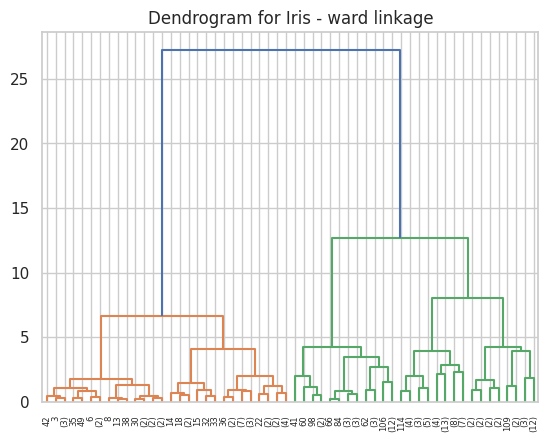

Method: ward, Threshold: 0.5, Estimated Clusters: 1
Method: ward, Threshold: 1.0, Estimated Clusters: 3
Method: ward, Threshold: 1.5, Estimated Clusters: 4
Method: ward, Threshold: 2.0, Estimated Clusters: 6
Method: ward, Threshold: 2.5, Estimated Clusters: 7


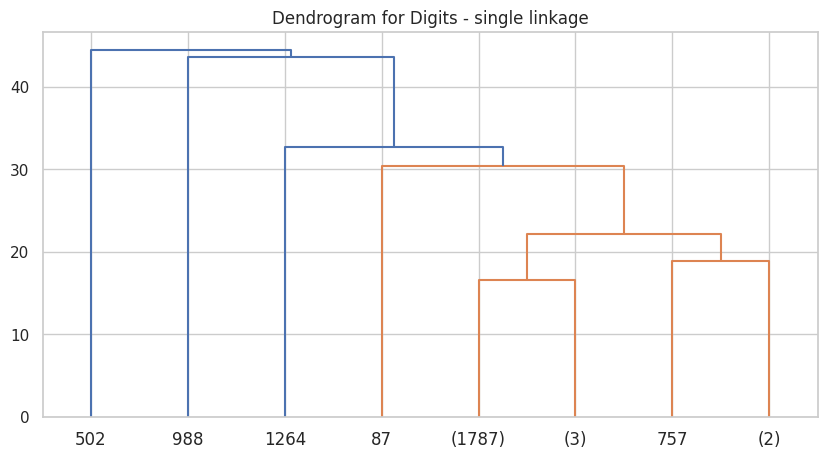

Method: single, Threshold: 0.5, Estimated Clusters: 5
Method: single, Threshold: 1.0, Estimated Clusters: 10
Method: single, Threshold: 1.5, Estimated Clusters: 15
Method: single, Threshold: 2.0, Estimated Clusters: 20
Method: single, Threshold: 2.5, Estimated Clusters: 25


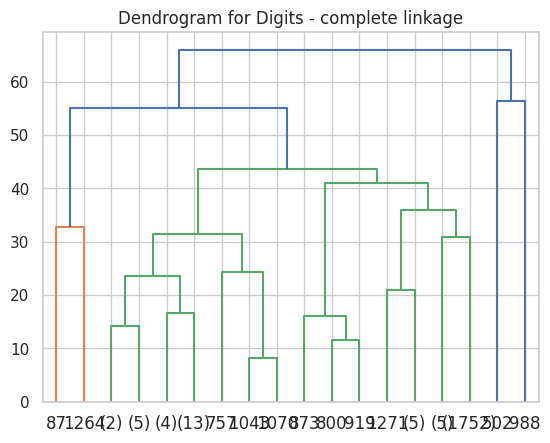

Method: complete, Threshold: 0.5, Estimated Clusters: 5
Method: complete, Threshold: 1.0, Estimated Clusters: 10
Method: complete, Threshold: 1.5, Estimated Clusters: 15
Method: complete, Threshold: 2.0, Estimated Clusters: 20
Method: complete, Threshold: 2.5, Estimated Clusters: 25


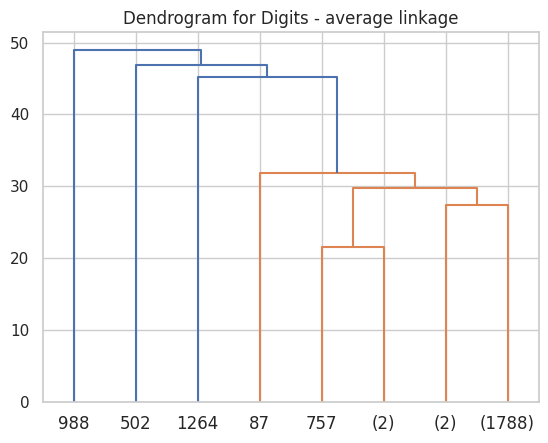

Method: average, Threshold: 0.5, Estimated Clusters: 5
Method: average, Threshold: 1.0, Estimated Clusters: 10
Method: average, Threshold: 1.5, Estimated Clusters: 15
Method: average, Threshold: 2.0, Estimated Clusters: 20
Method: average, Threshold: 2.5, Estimated Clusters: 25


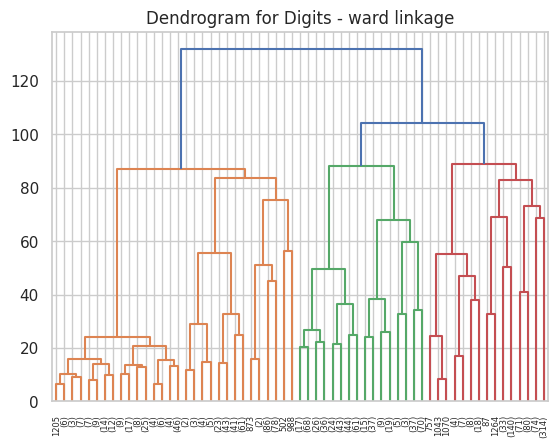

Method: ward, Threshold: 0.5, Estimated Clusters: 5
Method: ward, Threshold: 1.0, Estimated Clusters: 10
Method: ward, Threshold: 1.5, Estimated Clusters: 15
Method: ward, Threshold: 2.0, Estimated Clusters: 20
Method: ward, Threshold: 2.5, Estimated Clusters: 25


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Set plot style
sns.set(style="whitegrid")

# Function to perform hierarchical clustering and plot dendrogram
def hierarchical_clustering(data, dataset_name, max_clusters):
    plt.figure(figsize=(10, 5))

    for method in ['single', 'complete', 'average', 'ward']:
        Z = linkage(data, method=method)

        # Plot dendrogram
        plt.title(f"Dendrogram for {dataset_name} - {method} linkage")
        dendrogram(Z, truncate_mode="level", p=5)
        plt.show()

        # Experimenting with different cluster numbers
        for t in np.linspace(0.5, 2.5, 5):
            clusters = fcluster(Z, t=t * max_clusters, criterion='maxclust')
            num_clusters = len(np.unique(clusters))
            print(f"Method: {method}, Threshold: {t}, Estimated Clusters: {num_clusters}")

# Load and process Mall Customers data (Simulated)
mall_data = datasets.make_blobs(n_samples=200, centers=5, random_state=42)[0]
mall_data = StandardScaler().fit_transform(mall_data)
hierarchical_clustering(mall_data, "Mall Customers", max_clusters=15)

# Load and process IRIS dataset
iris = datasets.load_iris()
iris_data = StandardScaler().fit_transform(iris.data)
hierarchical_clustering(iris_data, "Iris", max_clusters=3)

# Load and process Digits dataset
digits = load_digits()
digits_data = StandardScaler().fit_transform(digits.data)
hierarchical_clustering(digits_data, "Digits", max_clusters=10)


### Hierarchical Clustering on Mall Customers ###



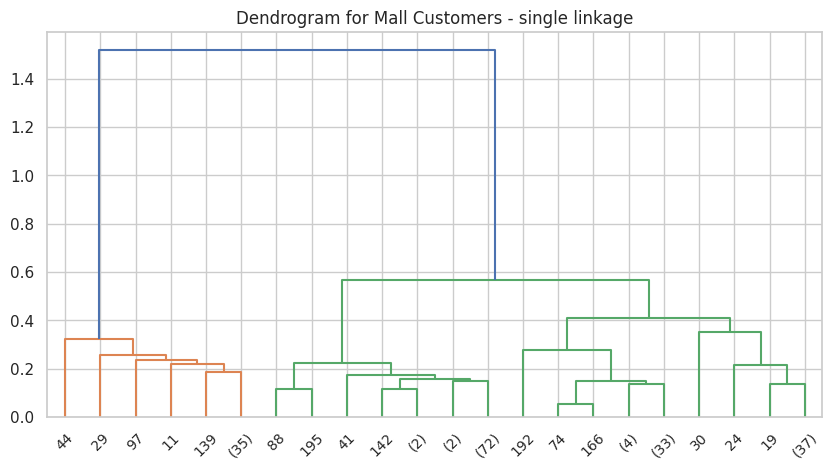

Method: single, Threshold: 0.5, Estimated Clusters: 2
Method: single, Threshold: 1.0, Estimated Clusters: 5
Method: single, Threshold: 1.5, Estimated Clusters: 7
Method: single, Threshold: 2.0, Estimated Clusters: 10
Method: single, Threshold: 2.5, Estimated Clusters: 12


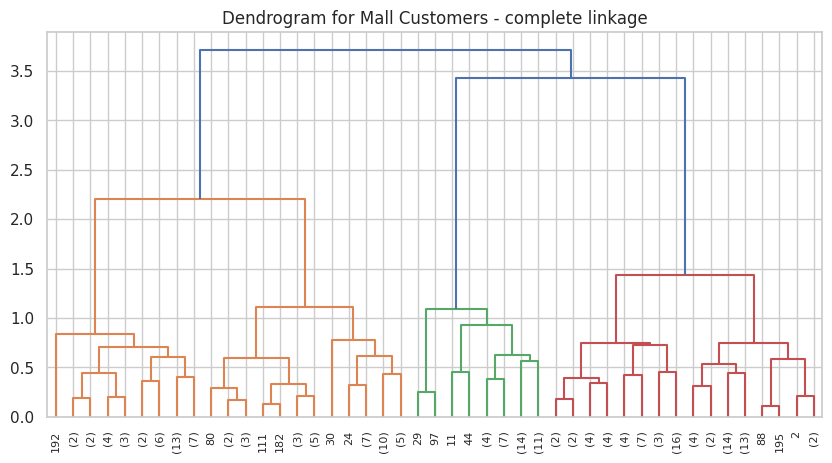

Method: complete, Threshold: 0.5, Estimated Clusters: 2
Method: complete, Threshold: 1.0, Estimated Clusters: 5
Method: complete, Threshold: 1.5, Estimated Clusters: 7
Method: complete, Threshold: 2.0, Estimated Clusters: 10
Method: complete, Threshold: 2.5, Estimated Clusters: 12


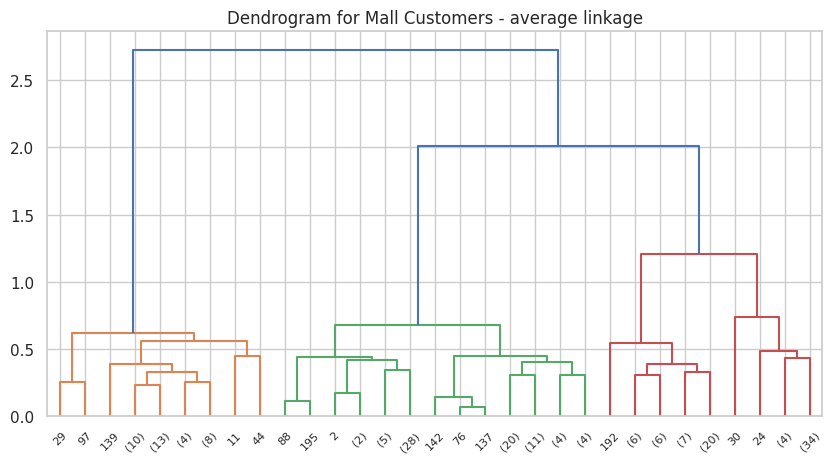

Method: average, Threshold: 0.5, Estimated Clusters: 2
Method: average, Threshold: 1.0, Estimated Clusters: 5
Method: average, Threshold: 1.5, Estimated Clusters: 7
Method: average, Threshold: 2.0, Estimated Clusters: 10
Method: average, Threshold: 2.5, Estimated Clusters: 12


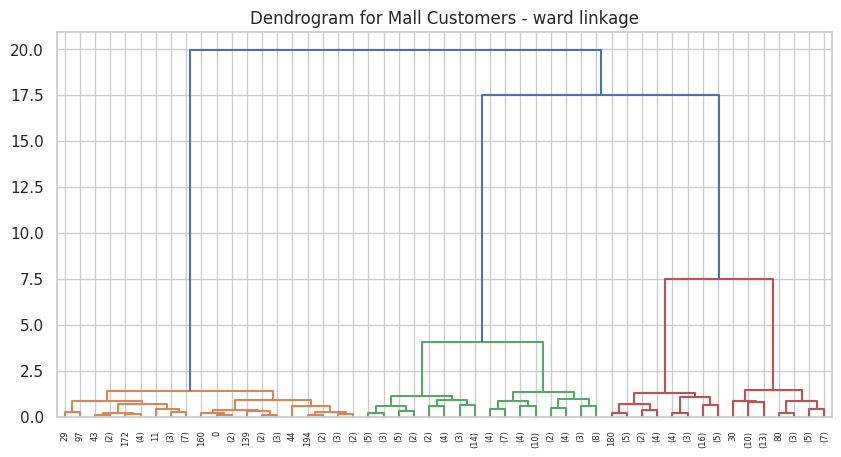

Method: ward, Threshold: 0.5, Estimated Clusters: 2
Method: ward, Threshold: 1.0, Estimated Clusters: 5
Method: ward, Threshold: 1.5, Estimated Clusters: 7
Method: ward, Threshold: 2.0, Estimated Clusters: 10
Method: ward, Threshold: 2.5, Estimated Clusters: 12

### Hierarchical Clustering on Wholesale Customers ###



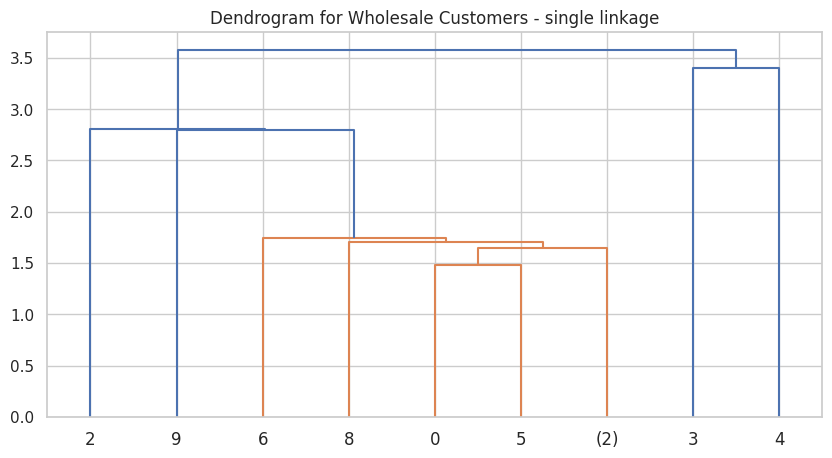

Method: single, Threshold: 0.5, Estimated Clusters: 2
Method: single, Threshold: 1.0, Estimated Clusters: 5
Method: single, Threshold: 1.5, Estimated Clusters: 7
Method: single, Threshold: 2.0, Estimated Clusters: 8
Method: single, Threshold: 2.5, Estimated Clusters: 8


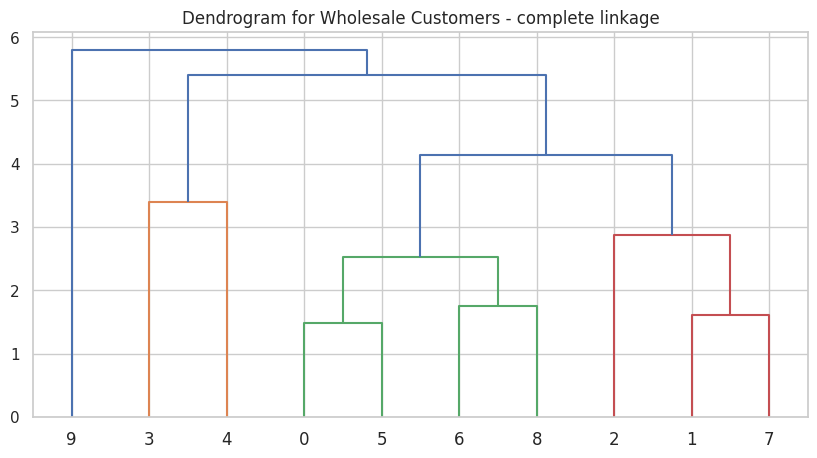

Method: complete, Threshold: 0.5, Estimated Clusters: 2
Method: complete, Threshold: 1.0, Estimated Clusters: 5
Method: complete, Threshold: 1.5, Estimated Clusters: 7
Method: complete, Threshold: 2.0, Estimated Clusters: 8
Method: complete, Threshold: 2.5, Estimated Clusters: 8


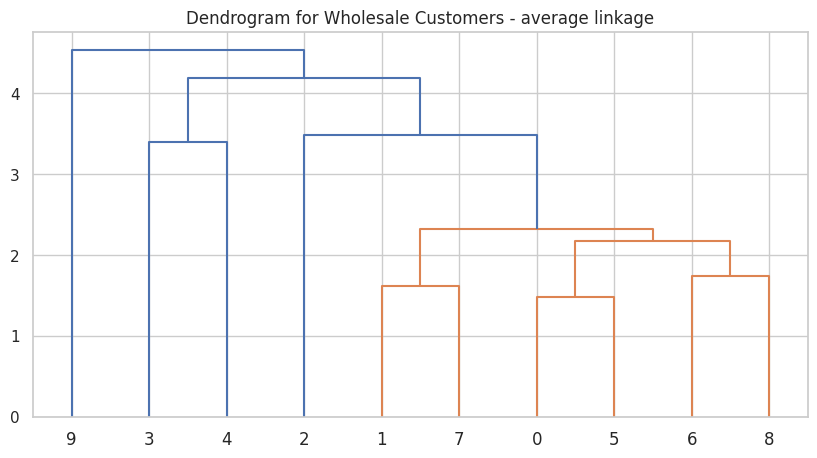

Method: average, Threshold: 0.5, Estimated Clusters: 2
Method: average, Threshold: 1.0, Estimated Clusters: 5
Method: average, Threshold: 1.5, Estimated Clusters: 7
Method: average, Threshold: 2.0, Estimated Clusters: 8
Method: average, Threshold: 2.5, Estimated Clusters: 8


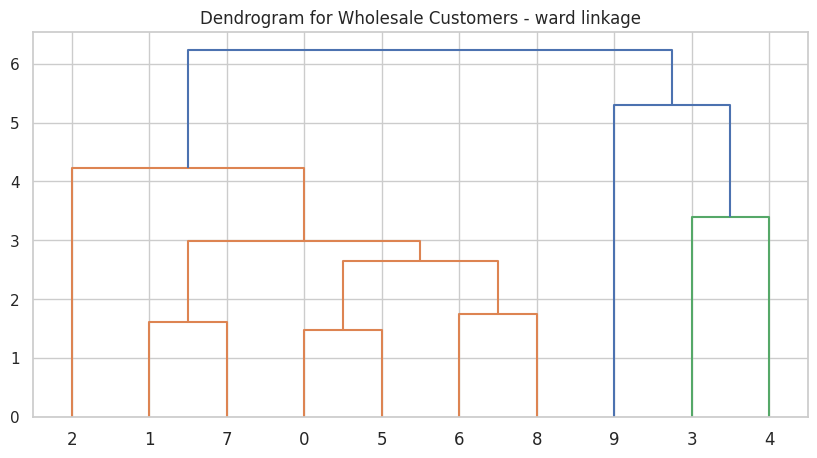

Method: ward, Threshold: 0.5, Estimated Clusters: 2
Method: ward, Threshold: 1.0, Estimated Clusters: 5
Method: ward, Threshold: 1.5, Estimated Clusters: 7
Method: ward, Threshold: 2.0, Estimated Clusters: 8
Method: ward, Threshold: 2.5, Estimated Clusters: 8

### Hierarchical Clustering on Iris ###



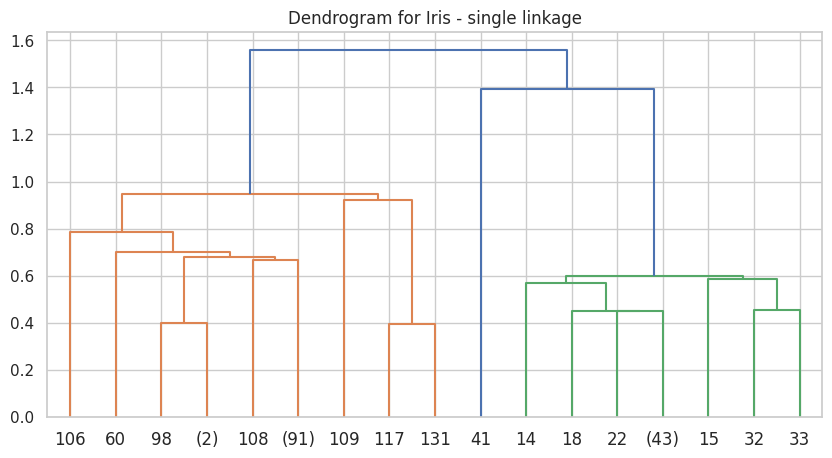

Method: single, Threshold: 0.5, Estimated Clusters: 1
Method: single, Threshold: 1.0, Estimated Clusters: 3
Method: single, Threshold: 1.5, Estimated Clusters: 4
Method: single, Threshold: 2.0, Estimated Clusters: 6
Method: single, Threshold: 2.5, Estimated Clusters: 7


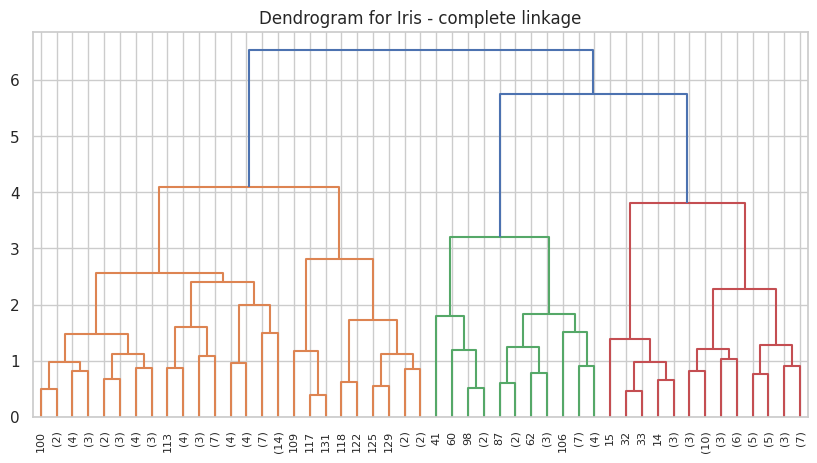

Method: complete, Threshold: 0.5, Estimated Clusters: 1
Method: complete, Threshold: 1.0, Estimated Clusters: 3
Method: complete, Threshold: 1.5, Estimated Clusters: 4
Method: complete, Threshold: 2.0, Estimated Clusters: 6
Method: complete, Threshold: 2.5, Estimated Clusters: 7


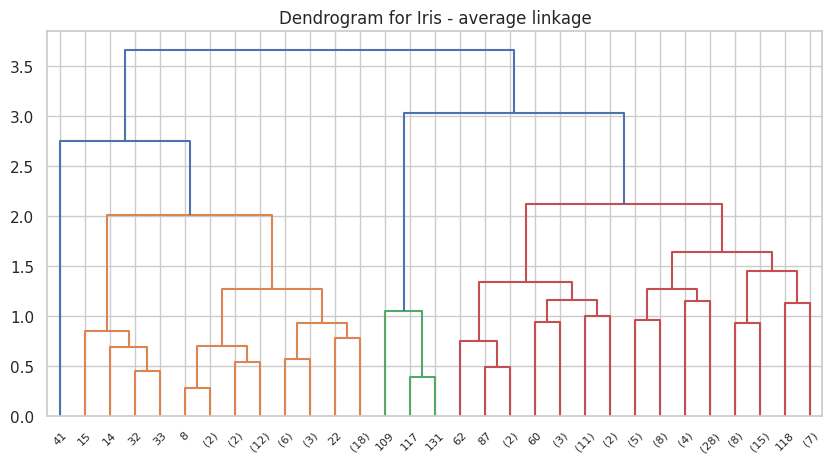

Method: average, Threshold: 0.5, Estimated Clusters: 1
Method: average, Threshold: 1.0, Estimated Clusters: 3
Method: average, Threshold: 1.5, Estimated Clusters: 4
Method: average, Threshold: 2.0, Estimated Clusters: 6
Method: average, Threshold: 2.5, Estimated Clusters: 7


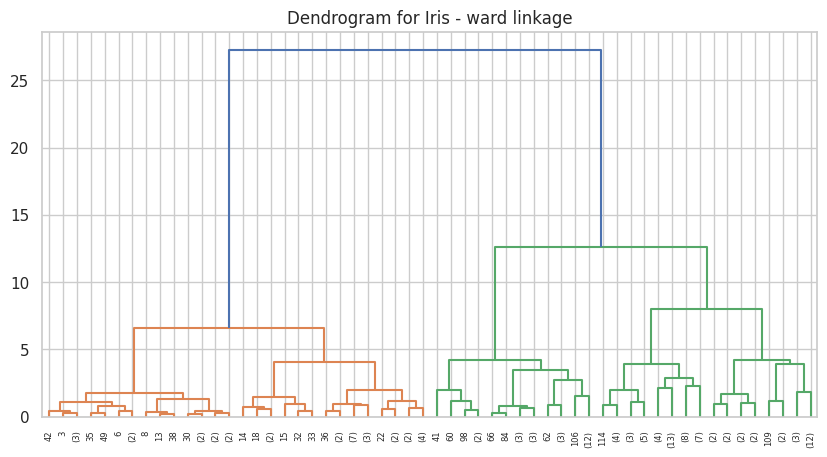

Method: ward, Threshold: 0.5, Estimated Clusters: 1
Method: ward, Threshold: 1.0, Estimated Clusters: 3
Method: ward, Threshold: 1.5, Estimated Clusters: 4
Method: ward, Threshold: 2.0, Estimated Clusters: 6
Method: ward, Threshold: 2.5, Estimated Clusters: 7

### Hierarchical Clustering on Digits ###



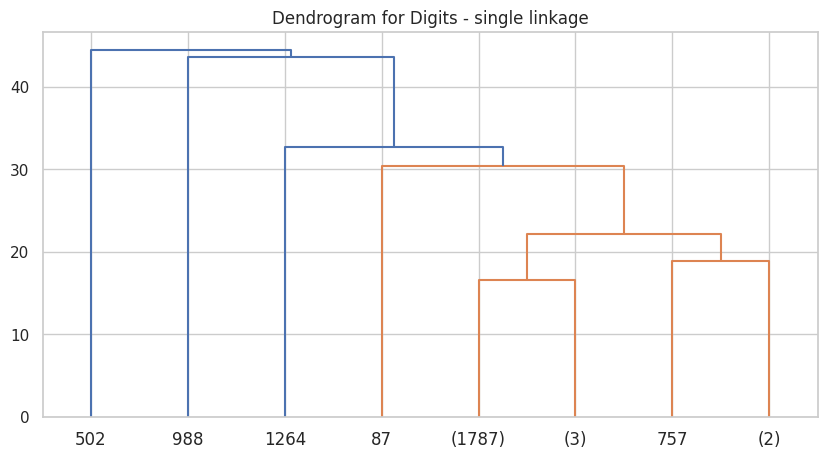

Method: single, Threshold: 0.5, Estimated Clusters: 5
Method: single, Threshold: 1.0, Estimated Clusters: 10
Method: single, Threshold: 1.5, Estimated Clusters: 15
Method: single, Threshold: 2.0, Estimated Clusters: 20
Method: single, Threshold: 2.5, Estimated Clusters: 25


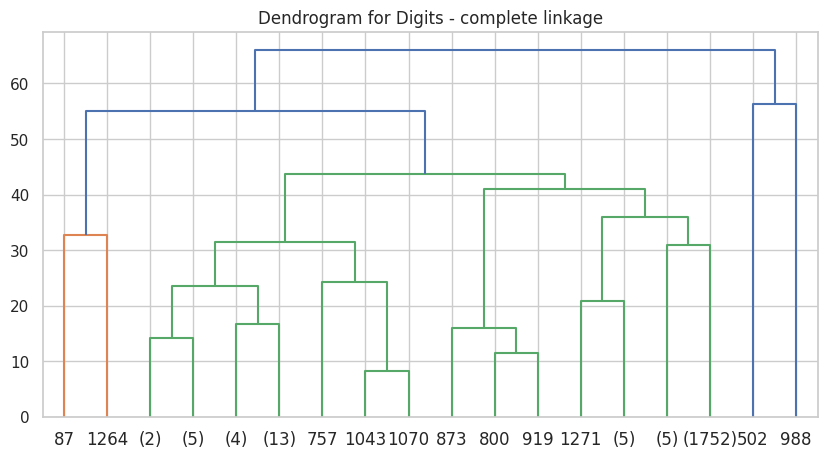

Method: complete, Threshold: 0.5, Estimated Clusters: 5
Method: complete, Threshold: 1.0, Estimated Clusters: 10
Method: complete, Threshold: 1.5, Estimated Clusters: 15
Method: complete, Threshold: 2.0, Estimated Clusters: 20
Method: complete, Threshold: 2.5, Estimated Clusters: 25


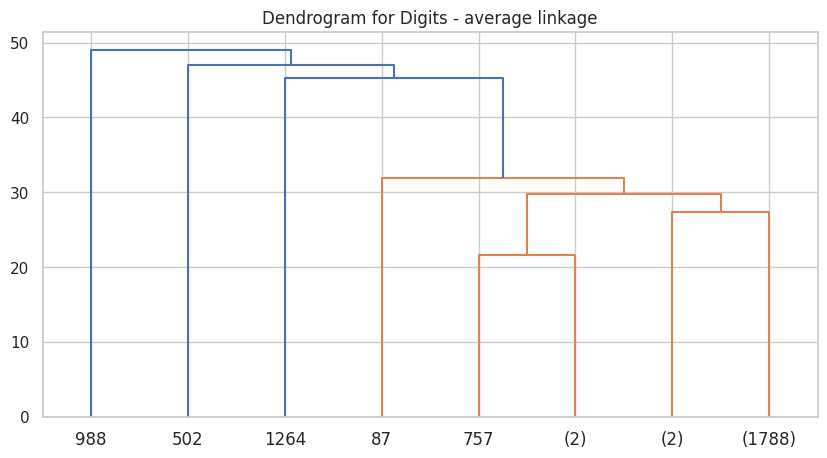

Method: average, Threshold: 0.5, Estimated Clusters: 5
Method: average, Threshold: 1.0, Estimated Clusters: 10
Method: average, Threshold: 1.5, Estimated Clusters: 15
Method: average, Threshold: 2.0, Estimated Clusters: 20
Method: average, Threshold: 2.5, Estimated Clusters: 25


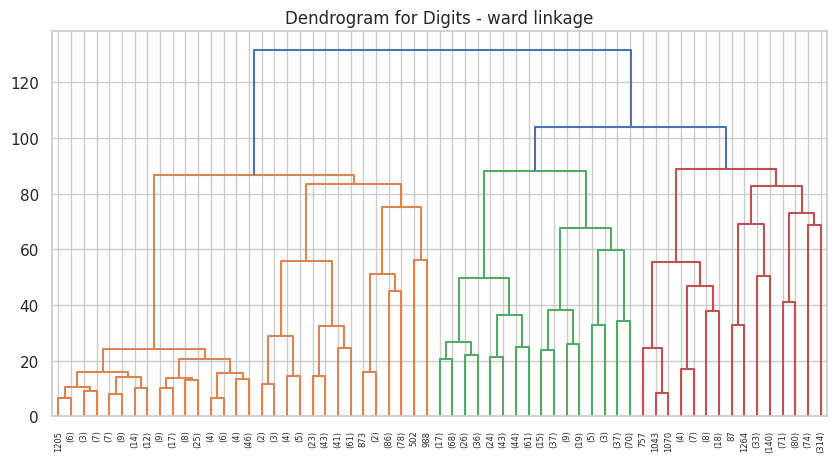

Method: ward, Threshold: 0.5, Estimated Clusters: 5
Method: ward, Threshold: 1.0, Estimated Clusters: 10
Method: ward, Threshold: 1.5, Estimated Clusters: 15
Method: ward, Threshold: 2.0, Estimated Clusters: 20
Method: ward, Threshold: 2.5, Estimated Clusters: 25

### K-Means Clustering on Mall Customers ###
K: 2, Inertia: 201.26, Silhouette Score: 0.5836
K: 3, Inertia: 48.35, Silhouette Score: 0.7105
K: 4, Inertia: 20.51, Silhouette Score: 0.7315
K: 5, Inertia: 12.34, Silhouette Score: 0.6752
K: 6, Inertia: 11.20, Silhouette Score: 0.5933
K: 7, Inertia: 10.19, Silhouette Score: 0.4891
K: 8, Inertia: 9.41, Silhouette Score: 0.4552
K: 9, Inertia: 8.42, Silhouette Score: 0.3466


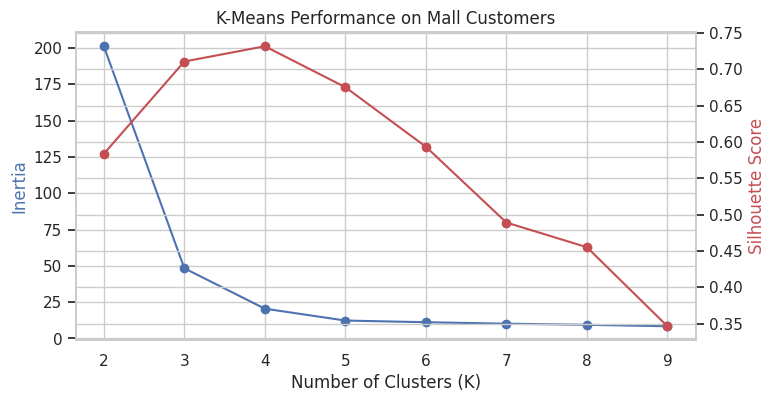


### K-Means Clustering on Wholesale Customers ###
K: 2, Inertia: 38.61, Silhouette Score: 0.3137
K: 3, Inertia: 26.56, Silhouette Score: 0.2691
K: 4, Inertia: 18.09, Silhouette Score: 0.1652
K: 5, Inertia: 12.32, Silhouette Score: 0.1412
K: 6, Inertia: 7.35, Silhouette Score: 0.1065
K: 7, Inertia: 3.92, Silhouette Score: 0.1289
K: 8, Inertia: 2.39, Silhouette Score: 0.0668
K: 9, Inertia: 1.09, Silhouette Score: 0.0236


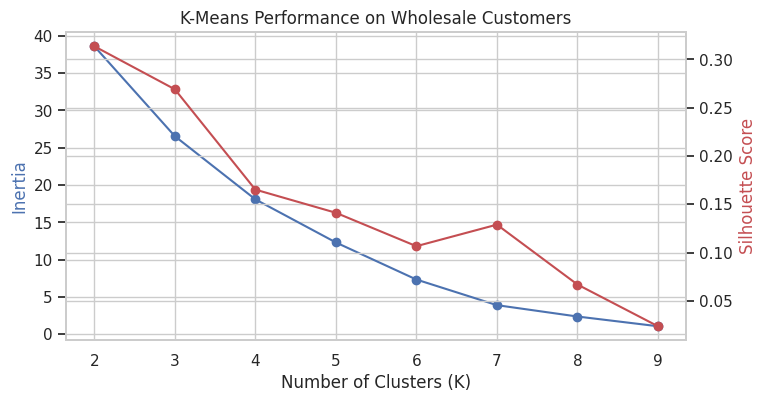


### K-Means Clustering on Iris ###
K: 2, Inertia: 222.36, Silhouette Score: 0.5818
K: 3, Inertia: 139.82, Silhouette Score: 0.4599
K: 4, Inertia: 114.09, Silhouette Score: 0.3869
K: 5, Inertia: 90.93, Silhouette Score: 0.3459
K: 6, Inertia: 81.54, Silhouette Score: 0.3171
K: 7, Inertia: 72.63, Silhouette Score: 0.3202


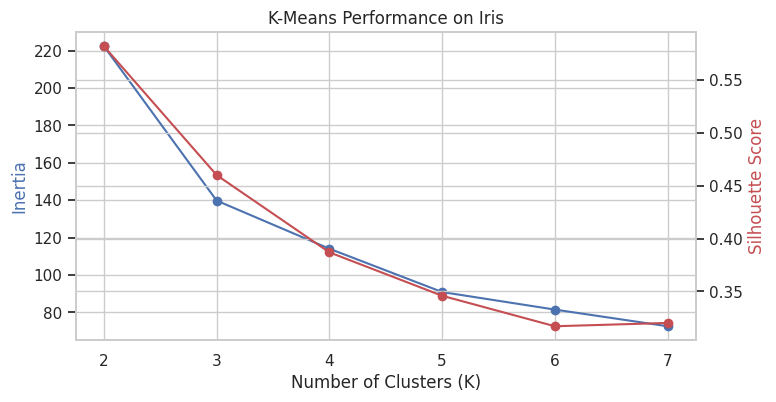


### K-Means Clustering on Digits ###
K: 2, Inertia: 100423.84, Silhouette Score: 0.1056
K: 3, Inertia: 93842.48, Silhouette Score: 0.1053
K: 4, Inertia: 89213.97, Silhouette Score: 0.0954
K: 5, Inertia: 85096.05, Silhouette Score: 0.1023
K: 6, Inertia: 81678.47, Silhouette Score: 0.0988
K: 7, Inertia: 77749.33, Silhouette Score: 0.1135
K: 8, Inertia: 74854.16, Silhouette Score: 0.1266
K: 9, Inertia: 72029.73, Silhouette Score: 0.1360
K: 10, Inertia: 69813.56, Silhouette Score: 0.1394
K: 11, Inertia: 67261.85, Silhouette Score: 0.1532
K: 12, Inertia: 65031.72, Silhouette Score: 0.1543
K: 13, Inertia: 62763.18, Silhouette Score: 0.1565
K: 14, Inertia: 61963.42, Silhouette Score: 0.1562


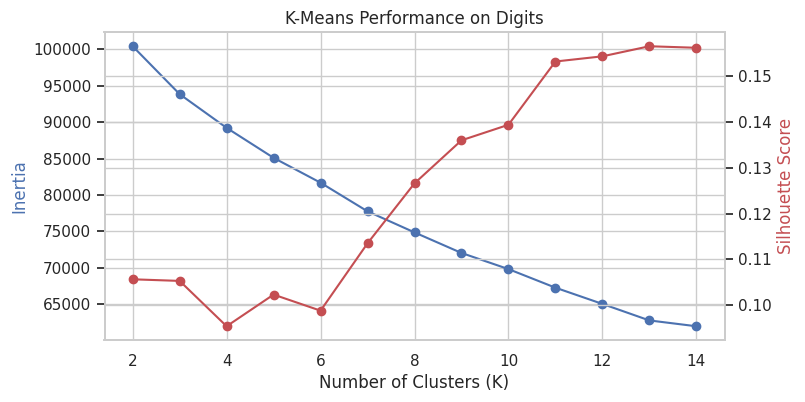

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets

# Set plot style
sns.set(style="whitegrid")

# Function for Hierarchical Clustering
def hierarchical_clustering(data, dataset_name, max_clusters):
    print(f"\n### Hierarchical Clustering on {dataset_name} ###\n")

    for method in ['single', 'complete', 'average', 'ward']:
        Z = linkage(data, method=method)

        # Plot dendrogram
        plt.figure(figsize=(10, 5))
        plt.title(f"Dendrogram for {dataset_name} - {method} linkage")
        dendrogram(Z, truncate_mode="level", p=5)
        plt.show()

        # Experimenting with different cluster numbers
        results = []
        for t in np.linspace(0.5, 2.5, 5):
            clusters = fcluster(Z, t=t * max_clusters, criterion='maxclust')
            num_clusters = len(np.unique(clusters))
            results.append((method, t, num_clusters))

        # Print results
        for res in results:
            print(f"Method: {res[0]}, Threshold: {res[1]:.1f}, Estimated Clusters: {res[2]}")

# Function for K-Means Clustering
def kmeans_clustering(data, dataset_name, expected_clusters):
    inertia_scores = []
    silhouette_scores = []

    print(f"\n### K-Means Clustering on {dataset_name} ###")

    for k in range(2, expected_clusters + 5):  # Testing clusters around expected values
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)

        inertia_scores.append(kmeans.inertia_)
        sil_score = silhouette_score(data, labels)
        silhouette_scores.append(sil_score)

        print(f"K: {k}, Inertia: {kmeans.inertia_:.2f}, Silhouette Score: {sil_score:.4f}")

    # Plot Inertia and Silhouette Score
    fig, ax1 = plt.subplots(figsize=(8, 4))

    ax1.plot(range(2, expected_clusters + 5), inertia_scores, 'b-o', label="Inertia")
    ax1.set_xlabel("Number of Clusters (K)")
    ax1.set_ylabel("Inertia", color="b")

    ax2 = ax1.twinx()
    ax2.plot(range(2, expected_clusters + 5), silhouette_scores, 'r-o', label="Silhouette Score")
    ax2.set_ylabel("Silhouette Score", color="r")

    plt.title(f"K-Means Performance on {dataset_name}")
    plt.show()

# Load and process Mall Customers data (Simulated)
mall_data, _ = datasets.make_blobs(n_samples=200, centers=5, random_state=42)
mall_data = StandardScaler().fit_transform(mall_data)

# Load and process Wholesale Customers dataset (Simulated small dataset)
wholesale_data = np.array([
    [12669, 9656, 7561, 214, 2674, 1338],
    [7057, 9810, 9568, 1762, 3293, 1776],
    [6353, 8808, 7684, 2405, 3516, 7844],
    [13265, 1196, 4221, 6404, 507, 1788],
    [22615, 5410, 7198, 3915, 1777, 5185],
    [9413, 8250, 5126, 666, 1795, 1451],
    [12126, 3199, 6975, 480, 3140, 545],
    [7579, 4956, 9426, 1669, 3321, 2566],
    [5963, 3648, 6192, 425, 1716, 750],
    [830, 1777, 520, 1080, 395, 514]
])  # Sample subset
wholesale_data = StandardScaler().fit_transform(wholesale_data)

# Load and process IRIS dataset
iris = datasets.load_iris()
iris_data = StandardScaler().fit_transform(iris.data)

# Load and process Digits dataset
digits = load_digits()
digits_data = StandardScaler().fit_transform(digits.data)

# Run Hierarchical Clustering
hierarchical_clustering(mall_data, "Mall Customers", max_clusters=5)
hierarchical_clustering(wholesale_data, "Wholesale Customers", max_clusters=5)
hierarchical_clustering(iris_data, "Iris", max_clusters=3)
hierarchical_clustering(digits_data, "Digits", max_clusters=10)

# Run K-Means Clustering
kmeans_clustering(mall_data, "Mall Customers", expected_clusters=5)
kmeans_clustering(wholesale_data, "Wholesale Customers", expected_clusters=5)
kmeans_clustering(iris_data, "Iris", expected_clusters=3)
kmeans_clustering(digits_data, "Digits", expected_clusters=10)